# Dataset Information: Mall Customers Dataset

## Overview:
The **Mall Customers Dataset** contains data on customers of a shopping mall, including demographic details and spending behavior. The dataset is commonly used for clustering and segmentation tasks to understand customer groups.

---

## Columns in the Dataset:

1. **CustomerID**:  
   - Unique identifier for each customer.  
   - *Type*: Integer.  

2. **Gender**:  
   - Customer's gender (Male or Female).  
   - *Type*: Categorical.  

3. **Age**:  
   - Age of the customer.  
   - *Type*: Integer.  

4. **Annual Income (k$)**:  
   - Customer's annual income (in thousands of dollars).  
   - *Type*: Numerical (Continuous).  

5. **Spending Score (1-100)**:  
   - A score assigned by the mall based on customer spending and behavior.  
   - *Type*: Numerical (Continuous).  
   - *Range*: 1 (lowest) to 100 (highest).  

---

## Purpose of the Dataset:
The dataset aims to identify distinct customer groups based on their **Annual Income** and **Spending Score**, which helps businesses tailor their strategies for customer engagement, marketing, and retention.


In [34]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.drop(['CustomerID'],axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [37]:
# statistical info
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [38]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [39]:
# check for null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

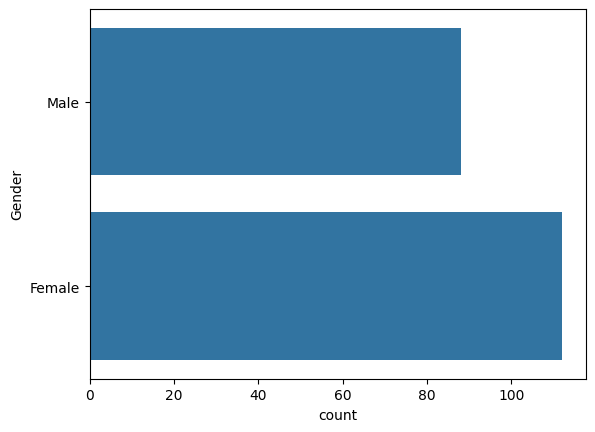

In [40]:
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

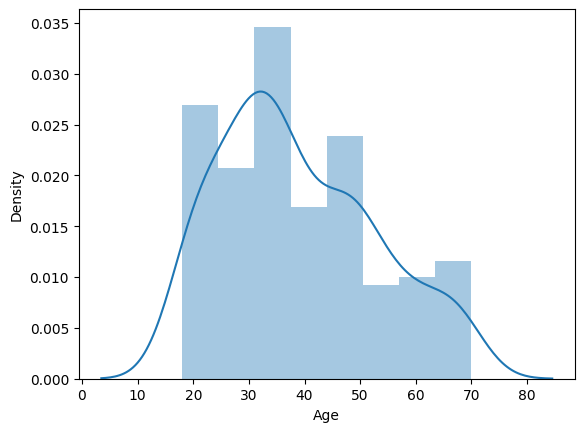

In [41]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

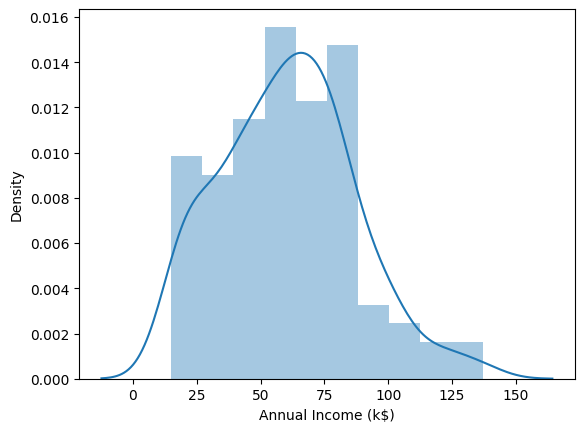

In [42]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

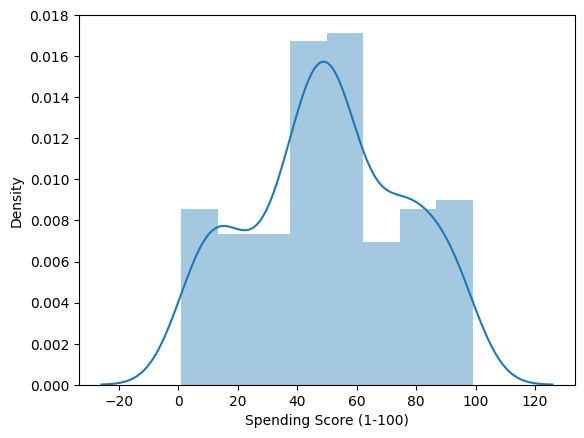

In [43]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

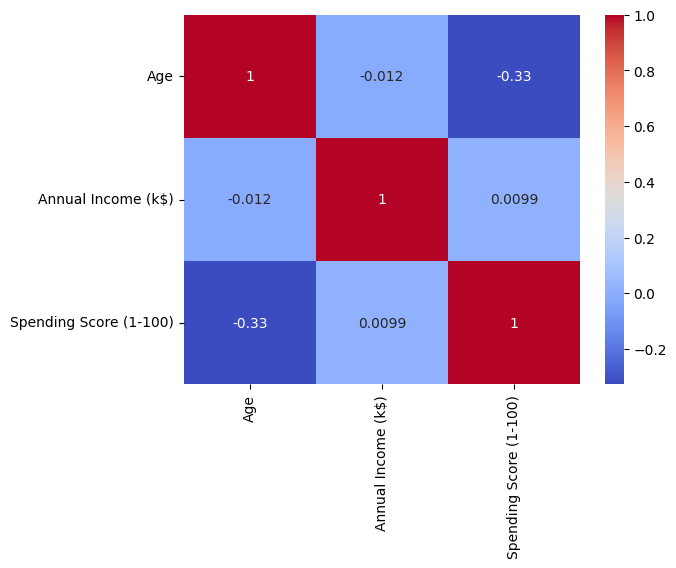

In [44]:
# Correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [45]:
# clustering
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

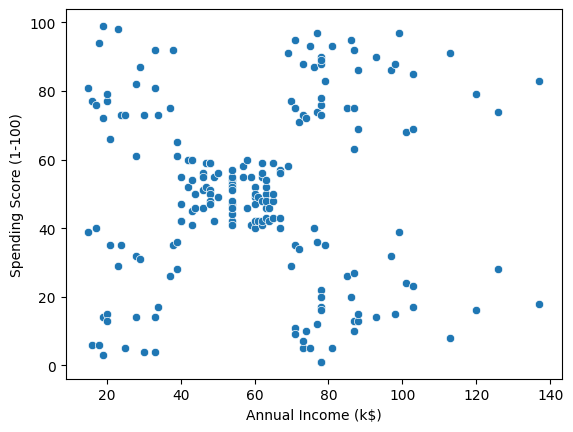

In [46]:
# scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1)

In [47]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

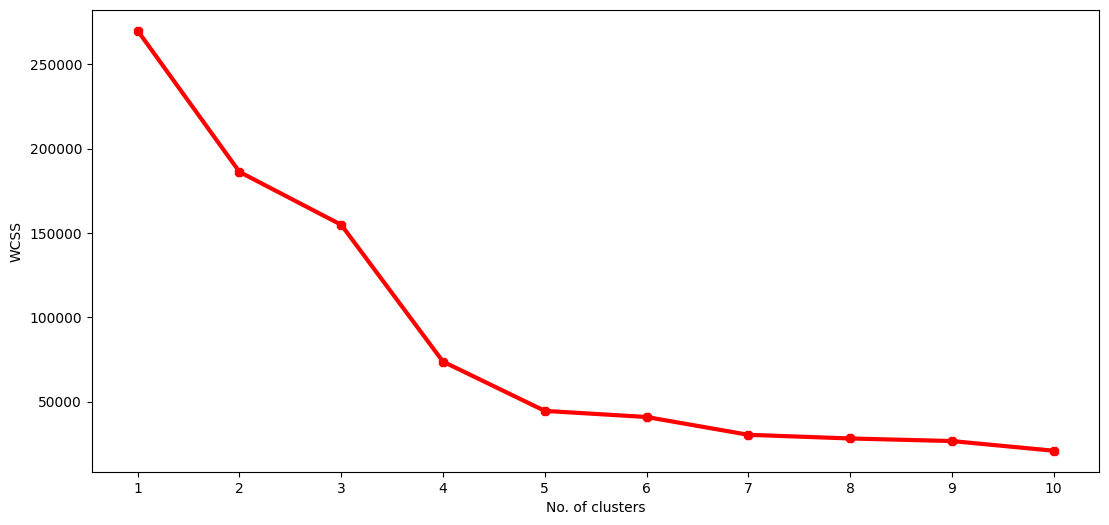

In [48]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [49]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

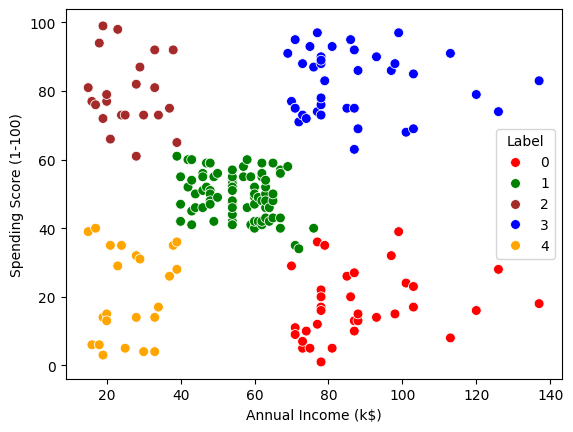

In [50]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

Hence 5 clusters of different customers groups have been formed.  
0: High income, low spending.  
1: Moderate income, moderate spending.  
2: Low income, high spending.  
3: High income, high spending.  
4: Low income, low spending.  